Question 10 


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("highlights_and_shadows.jpg", cv2.IMREAD_GRAYSCALE)
def bilateral_filter_manual(img, diameter, sigma_s, sigma_r):
    radius = diameter // 2
    padded = np.pad(img, radius, mode='reflect')
    output = np.zeros_like(img, dtype=np.float64)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+diameter, j:j+diameter]
            center = img[i, j]

            
            x, y = np.meshgrid(np.arange(diameter), np.arange(diameter))
            spatial = np.exp(-((x-radius)**2 + (y-radius)**2) / (2 * sigma_s**2))

            
            range_weight = np.exp(-((region - center)**2) / (2 * sigma_r**2))

            weights = spatial * range_weight
            output[i, j] = np.sum(weights * region) / np.sum(weights)

    return np.clip(output, 0, 255).astype(np.uint8)


In [4]:
gaussian = cv2.GaussianBlur(img, (9, 9), sigmaX=2)


In [5]:
bilateral_cv = cv2.bilateralFilter(img, d=9, sigmaColor=50, sigmaSpace=50)


In [6]:
bilateral_manual = bilateral_filter_manual(img, diameter=9, sigma_s=50, sigma_r=50)


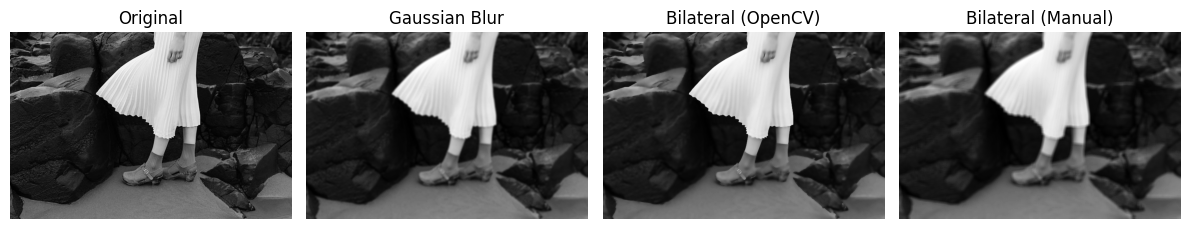

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Gaussian Blur")
plt.imshow(gaussian, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Bilateral (OpenCV)")
plt.imshow(bilateral_cv, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Bilateral (Manual)")
plt.imshow(bilateral_manual, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()
